In [319]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.metrics import r2_score
pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [4]:
data=pd.read_pickle('data.pkl')

In [40]:
#not scaled or transformed
data.rename(columns={'Total Followers':'Artist_Followers','Genre_adult standards':'Genre_adult_standards','Genre_carnaval limburg':'Genre_carnaval_limburg','Genre_mellow gold':'Genre_mellow_gold','Genre_hip_hop/rap':'Genre_hip_hop_rap','Genre_country/americana':'Genre_country_americana','Genre_singer-songwriter':'Genre_singer_songwriter'},inplace=True)

In [35]:
data.columns


Index(['BPM', 'Energy', 'Danceability', 'Loudness_db', 'Liveness', 'Valence',
       'Duration', 'Acousticness', 'Speechiness', 'Popularity',
       'Artist_Followers', 'yrs_since_release', 'word_count_in_title',
       'Genre_adult_standards', 'Genre_alternative', 'Genre_blues',
       'Genre_cabaret', 'Genre_carnaval_limburg', 'Genre_celtic',
       'Genre_chanson', 'Genre_classic', 'Genre_country/americana',
       'Genre_dance', 'Genre_disco', 'Genre_downtempo', 'Genre_folk',
       'Genre_funk', 'Genre_gabba', 'Genre_hip_hop/rap', 'Genre_indie',
       'Genre_jazz', 'Genre_latin', 'Genre_mellow_gold', 'Genre_metal',
       'Genre_opera', 'Genre_pop', 'Genre_punk', 'Genre_reggae', 'Genre_rock',
       'Genre_singer-songwriter', 'Genre_soul'],
      dtype='object')

In [18]:
#simple linear regression - model #1
#follower count seemed to have the highest correlation with popularity on its own

SLR = ols(formula='Popularity~Artist_Followers',data=data).fit()
SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     251.0
Date:                Wed, 06 May 2020   Prob (F-statistic):           2.50e-53
Time:                        17:54:15   Log-Likelihood:                -8027.2
No. Observations:                1995   AIC:                         1.606e+04
Df Residuals:                    1993   BIC:                         1.607e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           56.6680      0.352    160.854      0.000      55.977      57.359
Artist_Followers  6.014e-07    3.8e-08     15.842      0.000    5.27e-07    6.76e-07
==============================================================================
Omnibus:                       79.082   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.904
Skew:                          -0.511   Prob(JB):                     8.16e-20
Kurtosis:                       2.891   Cond. No.                     1.08e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     23.70
Date:                Wed, 06 May 2020   Prob (F-statistic):          5.97e-138
Time:                        18:07:37   Log-Likelihood:                -7751.0
No. Observations:                1995   AIC:                         1.558e+04
Df Residuals:                    1954   BIC:                         1.581e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  65.8595      3.731     17.650      0.000      58.542      73.177
BPM                         0.0078      0.010      0.780      0.435      -0.012       0.028
Energy                     -0.0743      0.025     -2.919      0.004      -0.124      -0.024
Danceability                0.1170      0.023      5.089      0.000       0.072       0.162
Loudness_db                 0.9377      0.126      7.471      0.000       0.692       1.184
Liveness                   -0.0776      0.017     -4.627      0.000      -0.110      -0.045
Valence                     0.0067      0.016      0.430      0.667      -0.024       0.037
Duration                   -0.0099      0.003     -3.227      0.001      -0.016      -0.004
Acousticness               -0.0078      0.013     -0.600      0.548      -0.033       0.018
Speechiness                 0.2053      0.067      3.061      0.002       0.074       0.337
Artist_Followers         4.608e-07   3.68e-08     12.526      0.000    3.89e-07    5.33e-07
yrs_since_release           0.2059      0.021      9.777      0.000       0.165       0.247
word_count_in_title        -0.1844      0.122     -1.507      0.132      -0.424       0.056
Genre_adult_standards      -1.8069      2.533     -0.713      0.476      -6.775       3.161
Genre_alternative           1.2825      2.347      0.546      0.585      -3.321       5.885
Genre_blues                -6.3385      4.794     -1.322      0.186     -15.741       3.064
Genre_cabaret             -13.0140      2.753     -4.727      0.000     -18.414      -7.614
Genre_carnaval_limburg    -21.5508      4.387     -4.912      0.000     -30.155     -12.946
Genre_celtic               -8.6099      5.808     -1.483      0.138     -20.000       2.780
Genre_chanson              -9.9439      5.386     -1.846      0.065     -20.507       0.619
Genre_classic             -12.2945      6.357     -1.934      0.053     -24.762       0.173
Genre_country_americana   -10.0754      3.118     -3.232      0.001     -16.190      -3.961
Genre_dance                -1.5361      2.809     -0.547      0.585      -7.045       3.973
Genre_disco                -1.5263      3.604     -0.423      0.672      -8.595       5.542
Genre_downtempo            -9.8126      6.351     -1.545      0.122     -22.267       2.642
Genre_folk                  2.8971      3.012      0.962      0.336      -3.009       8.804
Genre_funk                 -7.5656      3.984     -1.899      0.058     -15.380       0.248
Genre_gabba                -5.1891      8.755     -0.593      0.553     -22.359      11.981
Genre_hip_hop_rap          -3.2971      3.089     -1.068      0.286      -9.354       2.760
Genre_indie               -22.6287      2.605     -8.687      0.000     -27.737     -17.520
Genre_jazz                  3.3238      6.358  

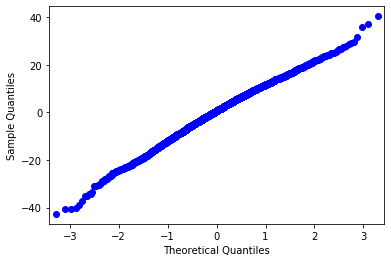

In [45]:
#MLR, model #2
#including all variables
#rsquared increased

features=data.columns.drop('Popularity')

model_2= ols(formula="Popularity~"+'+'.join(features), data=data).fit()
sm.qqplot(model_2.resid,dist=stats.norm)

model_2.summary()

In [61]:
#creating a copy of dataframe
data2=data

,BPM,Energy,Danceability,Loudness_db,Liveness,Valence,Duration,Acousticness,Speechiness
0,157,30,53,-14,11,68,201,94,3
1,135,79,50,-11,17,81,207,17,7
2,168,69,66,-9,7,52,341,2,17
3,173,96,43,-4,3,37,269,0,4
4,106,82,58,-5,10,87,256,1,3
...,...,...,...,...,...,...,...,...,...
1990,94,21,70,-12,11,72,128,84,7
1991,175,76,36,-8,76,95,136,73,6
1992,168,80,53,-9,31,97,162,74,7
1993,174,26,45,-13,7,60,324,54,4


In [51]:
features_to_transform=['BPM','Energy','Danceability','Loudness_db','Liveness','Valence','Duration','Acousticness','Speechiness']

In [369]:
#Model 3, only features included are interaction/poly transformation for every song element

polynomial_features= PolynomialFeatures(degree=2)
x_poly=polynomial_features.fit(data2[features_to_transform])

In [370]:
x_poly_df=pd.DataFrame(x_poly.transform(data2[features_to_transform]),columns=x_poly.get_feature_names(data2[features_to_transform].columns))

In [371]:
x_poly_df.drop(columns=['1','BPM', 'Energy', 'Danceability', 'Loudness_db', 'Liveness',
       'Valence', 'Duration', 'Acousticness', 'Speechiness'],inplace=True)

In [372]:
model_3=LinearRegression()
model_3.fit(x_poly_df,data2['Popularity'])
y_pred=model_3.predict(x_poly_df)

In [373]:
r2 = r2_score(data2['Popularity'],y_pred)

In [374]:
print(r2)

0.09148729033067893


In [375]:
data3=pd.concat([data2,x_poly_df],axis=1)

In [376]:
#datafame of Y, all original features, polynomial transformations of all song audio variables
data3

,BPM,Energy,Danceability,Loudness_db,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity,Artist_Followers,yrs_since_release,word_count_in_title,Genre_adult_standards,Genre_alternative,Genre_blues,Genre_cabaret,Genre_carnaval_limburg,Genre_celtic,Genre_chanson,Genre_classic,Genre_country_americana,Genre_dance,Genre_disco,Genre_downtempo,Genre_folk,Genre_funk,Genre_gabba,Genre_hip_hop_rap,Genre_indie,Genre_jazz,Genre_latin,Genre_mellow_gold,Genre_metal,Genre_opera,Genre_pop,Genre_punk,Genre_reggae,Genre_rock,Genre_singer_songwriter,Genre_soul,BPM^2,BPM Energy,BPM Danceability,BPM Loudness_db,BPM Liveness,BPM Valence,BPM Duration,BPM Acousticness,BPM Speechiness,Energy^2,Energy Danceability,Energy Loudness_db,Energy Liveness,Energy Valence,Energy Duration,Energy Acousticness,Energy Speechiness,Danceability^2,Danceability Loudness_db,Danceability Liveness,Danceability Valence,Danceability Duration,Danceability Acousticness,Danceability Speechiness,Loudness_db^2,Loudness_db Liveness,Loudness_db Valence,Loudness_db Duration,Loudness_db Acousticness,Loudness_db Speechiness,Liveness^2,Liveness Valence,Liveness Duration,Liveness Acousticness,Liveness Speechiness,Valence^2,Valence Duration,Valence Acousticness,Valence Speechiness,Duration^2,Duration Acousticness,Duration Speechiness,Acousticness^2,Acousticness Speechiness,Speechiness^2
0,157,30,53,-14,11,68,201,94,3,71,2152743,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,24649.0,4710.0,8321.0,-2198.0,1727.0,10676.0,31557.0,14758.0,471.0,900.0,1590.0,-420.0,330.0,2040.0,6030.0,2820.0,90.0,2809.0,-742.0,583.0,3604.0,10653.0,4982.0,159.0,196.0,-154.0,-952.0,-2814.0,-1316.0,-42.0,121.0,748.0,2211.0,1034.0,33.0,4624.0,13668.0,6392.0,204.0,40401.0,18894.0,603.0,8836.0,282.0,9.0
1,135,79,50,-11,17,81,207,17,7,39,3080343,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,18225.0,10665.0,6750.0,-1485.0,2295.0,10935.0,27945.0,2295.0,945.0,6241.0,3950.0,-869.0,1343.0,6399.0,16353.0,1343.0,553.0,2500.0,-550.0,850.0,4050.0,10350.0,850.0,350.0,121.0,-187.0,-891.0,-2277.0,-187.0,-77.0,289.0,1377.0,3519.0,289.0,119.0,6561.0,16767.0,1377.0,567.0,42849.0,3519.0,1449.0,289.0,119.0,49.0
2,168,69,66,-9,7,52,341,2,17,69,5402898,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,28224.0,11592.0,11088.0,-1512.0,1176.0,8736.0,57288.0,336.0,2856.0,4761.0,4554.0,-621.0,483.0,3588.0,23529.0,138.0,1173.0,4356.0,-594.0,462.0,3432.0,22506.0,132.0,1122.0,81.0,-63.0,-468.0,-3069.0,-18.0,-153.0,49.0,364.0,2387.0,14.0,119.0,2704.0,17732.0,104.0,884.0,116281.0,682.0,5797.0,4.0,34.0,289.0
3,173,96,43,-4,3,37,269,0,4,76,7461956,12,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29929.0,16608.0,7439.0,-692.0,519.0,6401.0,46537.0,0.0,692.0,9216.0,4128.0,-384.0,288.0,3552.0,25824.0,0.0,384.0,1849.0,-172.0,129.0,1591.0,11567.0,0.0,172.0,16.0,-12.0,-148.0,-1076.0,-0.0,-16.0,9.0,111.0,807.0,0.0,12.0,1369.0,9953.0,0.0,148.0,72361.0,0.0,1076.0,0.0,0.0,16.0
4,106,82,58,-5,10,87,256,1,3,59,3079845,17,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11236.0,8692.0,6148.0,-530.0,1060.0,9222.0,27136.0,106.0,318.0,6724.0,4756.0,-410.0,820.0,7134.0,20992.0,82.0,246.0,3364.0,-290.0,580.0,5046.0,14848.0,58.0,174.0,25.0,-50.0,-435.0,-1280.0,-5.0,-15.0,100.0,870.0,2560.0,10.0,30.0,7569.0,22272.0,87.0,261.0,65536.0,256.0,768.0,1.0,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,94,21,70,-12,11,72,128,84,7,63,4126195,61,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8836.0,1974.0,6580.0,-1128.0,1034.0,6768.0,12032.0,7896.0,658.0,441.0,1470.0,-252.0,231.0,1512.0,2688.0,1764.0,147.0,4900.0,-840.0,770.0,5040.0,8960.0,5880.0,490.0,144.0,-132.0,-864.0,-1536.0,-1008.0,

In [377]:
target_pop=data3['Popularity']
features_all=data3.drop(columns='Popularity')

In [378]:
len(features_all.columns)

85

In [379]:
#model 5, all features and all polynomial columns for song elements
model_5=LinearRegression()
model_5.fit(features_all,data3['Popularity'])
y_pred_all=model_5.predict(features_all)
r2 = r2_score(data3['Popularity'],y_pred_all)

In [380]:
r2

0.3444812196963567

In [127]:
#model 4, applying polynomial transformation to all features for every variable
x_poly_all=polynomial_features.fit_transform(data2[features])

In [128]:
model_4=LinearRegression()
model_4.fit(x_poly_all,data2['Popularity'])
y_pred_2=model_4.predict(x_poly_all)

In [129]:
r2 = r2_score(data2['Popularity'],y_pred_2)
r2

0.4603655962141332

In [132]:
features

Index(['BPM', 'Energy', 'Danceability', 'Loudness_db', 'Liveness', 'Valence',
       'Duration', 'Acousticness', 'Speechiness', 'Artist_Followers',
       'yrs_since_release', 'word_count_in_title', 'Genre_adult_standards',
       'Genre_alternative', 'Genre_blues', 'Genre_cabaret',
       'Genre_carnaval_limburg', 'Genre_celtic', 'Genre_chanson',
       'Genre_classic', 'Genre_country_americana', 'Genre_dance',
       'Genre_disco', 'Genre_downtempo', 'Genre_folk', 'Genre_funk',
       'Genre_gabba', 'Genre_hip_hop_rap', 'Genre_indie', 'Genre_jazz',
       'Genre_latin', 'Genre_mellow_gold', 'Genre_metal', 'Genre_opera',
       'Genre_pop', 'Genre_punk', 'Genre_reggae', 'Genre_rock',
       'Genre_singer_songwriter', 'Genre_soul'],
      dtype='object')

In [153]:
#model 6 all original x variables, all transformed x variables
all_poly=polynomial_features.fit(data2[features])
x_poly_df_all=pd.DataFrame(all_poly.transform(data2[features]),columns=all_poly.get_feature_names(data2[features].columns))

In [154]:
x_poly_df_all.drop(columns='1',inplace=True)

In [155]:
len(x_poly_df_all.columns)

860

In [156]:
model_6=LinearRegression()
model_6.fit(x_poly_df_all,data2['Popularity'])
y_pred_6=model_6.predict(x_poly_df_all)
r2 = r2_score(data2['Popularity'],y_pred_6)
r2

0.4824250161516346

In [ ]:
#next test,train,split and scale
#then feature selection

In [158]:
data_final=pd.concat([x_poly_df_all,data2['Popularity']],axis=1)

In [395]:
data_final.shape

(1995, 861)

In [423]:
#target_final=data_final.Popularity
target_final=data3.Popularity

In [424]:
#features_final=data_final.drop(columns="Popularity")
features_final=data3.drop(columns="Popularity")

In [425]:
len(features_final.columns)

85

In [270]:
#data3

In [426]:
#test train split of final complete dataset with all transformed variables
x_train, x_test, y_train, y_test = train_test_split(features_final, target_final, random_state=32,test_size=0.2)


In [427]:
#scaler for all x train and x test variables 
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled =pd.DataFrame(data=scaler.transform(x_train), columns=features_final.columns)
x_test_scaled =pd.DataFrame(data=scaler.transform(x_test), columns=features_final.columns)

In [210]:
one_feat=['Artist_Followers']

In [211]:
one_feat

['Artist_Followers']

In [428]:
#baseline model, one feature - not transformed

lm_one = LinearRegression()

lm_one = lm_one.fit(x_train_scaled[one_feat], y_train)

y_pred_lm_one=lm_one.predict(x_train_scaled[one_feat])

train_rmse_lm_one = np.sqrt(metrics.mean_squared_error(y_train, y_pred_lm_one))

y_pred_test_lm_one = lm_one.predict(x_test_scaled[one_feat])

test_rmse_lm_one = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lm_one))


print("Train RMSE", int(train_rmse_lm_one), "Test RMSE: ", int(test_rmse_lm_one))
print ("Score:", lm_one.score(x_test_scaled[one_feat], y_test))

Train RMSE 13 Test RMSE:  13
Score: 0.09626134685727272


In [429]:
#all features model, all transformed song elements and all original - 250 features

lm_two = LinearRegression()

lm_two = lm_two.fit(x_train_scaled, y_train)

y_pred_lm_two=lm_two.predict(x_train_scaled)

train_rmse_lm_two = np.sqrt(metrics.mean_squared_error(y_train, y_pred_lm_two))

y_pred_test_lm_two = lm_two.predict(x_test_scaled)

test_rmse_lm_two = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lm_two))


print("Train RMSE", int(train_rmse_lm_two), "Test RMSE: ", int(test_rmse_lm_two))
print ("Score:", lm_two.score(x_test_scaled, y_test))

Train RMSE 11 Test RMSE:  11
Score: 0.2648749934756638


In [388]:
#recursive wrapper method - feature selection
from sklearn.feature_selection import RFECV
ols = linear_model.LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(x_train_scaled, y_train)



RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [389]:
selected_columns = x_train_scaled.columns[selector.support_]
removed_columns = x_train_scaled.columns[~selector.support_]

In [390]:
len(list(removed_columns))

39

In [562]:
len(list(selected_columns))

46

In [430]:
#model 3 with selected features as determined by RFECV 

lm_three = LinearRegression()

lm_three = lm_three.fit(x_train_scaled[selected_columns], y_train)

y_pred_lm_three=lm_three.predict(x_train_scaled[selected_columns])

train_rmse_lm_three = np.sqrt(metrics.mean_squared_error(y_train, y_pred_lm_three))

y_pred_test_lm_three = lm_three.predict(x_test_scaled[selected_columns])

test_rmse_lm_three = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lm_three))


print("Train RMSE", int(train_rmse_lm_three), "Test RMSE: ", int(test_rmse_lm_three))
print ("Score:", lm_three.score(x_test_scaled[selected_columns], y_test))

Train RMSE 11 Test RMSE:  11
Score: 0.2658923016310828


In [574]:
#model 4 using Lasso

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.1, normalize=False)

lasso.fit(x_train_scaled[selected_columns],y_train)

y_train_pred_lasso = lasso.predict(x_train_scaled[selected_columns])
y_pred_lasso = lasso.predict(x_test_scaled[selected_columns])

train_rmse_lasso = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse_lasso) )
print('Testing Error: '+ str(test_rmse_lasso) )

lasso.score(x_test_scaled[selected_columns],y_test)

Training Error: 9.58024751131949
Testing Error: 11.631622670900851


0.28997972722295406

,0
Genre_indie,-4.135311
Danceability Duration,-3.512693
Danceability^2,-1.936331
Genre_pop,-1.918394
Acousticness Speechiness,-1.918193
Genre_rock,-1.868481
Energy Speechiness,-1.857362
Duration Speechiness,-1.713904
Genre_cabaret,-1.711373
Danceability Speechiness,-1.650424


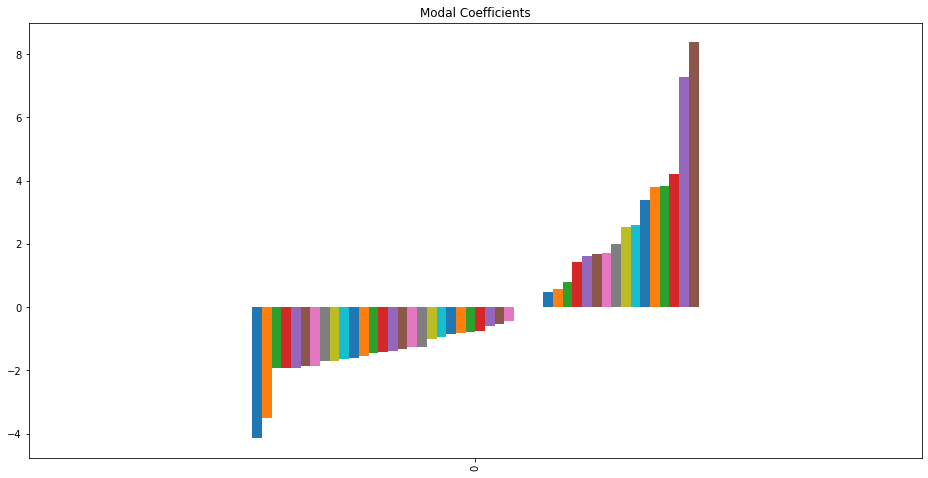

In [567]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = x_train_scaled[selected_columns].columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))
lasso_coef01.T



In [528]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

sel_=SelectFromModel(LassoCV())
sel_.fit(x_train_scaled,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv='warn',
                                  eps=0.001, fit_intercept=True, max_iter=1000,
                                  n_alphas=100, n_jobs=None, normalize=False,
                                  positive=False, precompute='auto',
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, verbose=False),
                max_features=40, norm_order=1, prefit=False, threshold=None)

In [529]:
sel_.get_support()

array([False, False,  True, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True])

In [530]:
selected_feats=x_train_scaled.columns[(sel_.get_support())]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))


total features: 85
selected features: 34
features with coefficients shrank to zero: 51


In [531]:
selected_feats

Index(['Danceability', 'Artist_Followers', 'yrs_since_release',
       'word_count_in_title', 'Genre_adult_standards', 'Genre_alternative',
       'Genre_blues', 'Genre_cabaret', 'Genre_carnaval_limburg',
       'Genre_celtic', 'Genre_classic', 'Genre_country_americana',
       'Genre_dance', 'Genre_downtempo', 'Genre_folk', 'Genre_funk',
       'Genre_indie', 'Genre_jazz', 'Genre_mellow_gold', 'Genre_metal',
       'Genre_pop', 'Genre_singer_songwriter', 'Genre_soul',
       'BPM Danceability', 'BPM Loudness_db', 'BPM Speechiness',
       'Energy Loudness_db', 'Loudness_db^2', 'Loudness_db Liveness',
       'Loudness_db Duration', 'Liveness^2', 'Liveness Duration',
       'Acousticness Speechiness', 'Speechiness^2'],
      dtype='object')

In [560]:
#Model 5 linear regression with lasso selected features
lm_five = LinearRegression()

lm_five = lm_five.fit(x_train_scaled[selected_feats], y_train)

y_pred_lm_five=lm_five.predict(x_train_scaled[selected_feats])

train_rmse_lm_five = np.sqrt(metrics.mean_squared_error(y_train, y_pred_lm_five))

y_pred_test_lm_five = lm_five.predict(x_test_scaled[selected_feats])

test_rmse_lm_five = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lm_five))


print("Train RMSE", train_rmse_lm_five, "Test RMSE: ", test_rmse_lm_five)
print ("Score:", lm_five.score(x_test_scaled[selected_feats], y_test))

Train RMSE 11.864271670187073 Test RMSE:  11.688024481674052
Score: 0.28307724716525395


In [550]:
coef_df=pd.DataFrame(lm_five.coef_)

In [546]:
dftest=pd.DataFrame(selected_feats)

In [551]:
coeff_df=pd.concat([dftest,coef_df],axis=1)

In [558]:
coeff_df.columns='Feature','Coef'

In [559]:
lm_five.coef_

array([ 1.4518957 ,  3.91311637,  3.43834436, -0.34487009,  0.60977685,
        1.59520289, -0.19868293, -1.25974051, -1.27428202, -0.25565131,
       -0.40684896, -0.810561  ,  0.40767517, -0.22027716,  0.97518327,
       -0.69102042, -3.47046671,  0.41013487,  0.17486489, -0.3518086 ,
       -0.35796155, -0.52335902,  0.69884321,  0.48933469,  0.83929107,
        0.63951042,  0.81934723, -0.22987568,  0.62052671,  1.07767066,
       -0.59676287, -0.25256101, -0.74393055,  0.64456029])

In [557]:
coeff_df

,Feature,Coefficient
0,Danceability,1.451896
1,Artist_Followers,3.913116
2,yrs_since_release,3.438344
3,word_count_in_title,-0.344870
4,Genre_adult_standards,0.609777
5,Genre_alternative,1.595203
6,Genre_blues,-0.198683
7,Genre_cabaret,-1.259741
8,Genre_carnaval_limburg,-1.274282
9,Genre_celtic,-0.255651


Text(0, 0.5, 'Predictions')

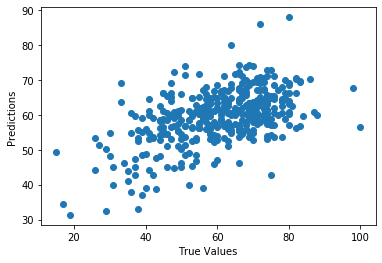

In [538]:
plt.scatter(y_test, y_pred_test_lm_five)
plt.xlabel("True Values")
plt.ylabel("Predictions")

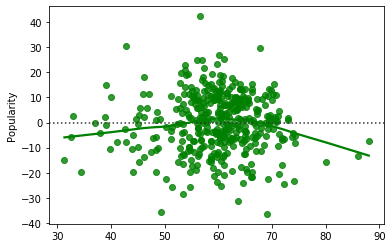

In [540]:
sns.residplot(y_pred_test_lm_five, y_test, lowess=True, color="g")

In [575]:
y_test.std()

13.821330196416799

In [576]:
y_test.mean()

60.5187969924812

In [579]:
11.688/y_test.std()

0.8456494298233417